<a href="https://colab.research.google.com/github/Saifparihar/PLAY-STORE-APP-REVIEW-ANALYSIS/blob/main/PLAY_STORE_APP_REVIEW_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - PLAY STORE APP REVIEW ANALYSIS



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -**  Saif Ali Parihar


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Saifparihar/PLAY-STORE-APP-REVIEW-ANALYSIS

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
import seaborn as sns

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Play Store App Review Dataset
df1 = pd.read_csv('/content/drive/MyDrive/Almabetter Projects/EDA/Play Store Data.csv')

In [5]:
# Importing Play Store App Sentiment Data ## Customer Review Data
df2=pd.read_csv('/content/drive/MyDrive/Almabetter Projects/EDA/User Reviews.csv')

### Dataset First View

In [6]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df1.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [9]:
df2.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [10]:
num_rows = df1.shape[0]
num_columns = df1.shape[1]


print("Play Store Dataset size(First Data frame)")
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Play Store Dataset size(First Data frame)
Number of rows: 10841
Number of columns: 13


### Dataset Information

In [11]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
len(df1[df1.duplicated()])

483

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Text(0.5, 1.0, 'Missing Values Heatmap')

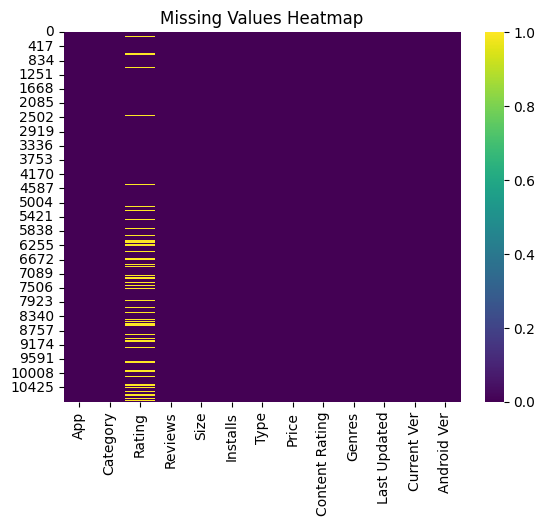

In [14]:
# Visualizing the missing values
sns.heatmap(df1.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
#As we can see, the rating column is the only one showing a relation with yellow strips because it is the only one with as many as 1474 null values

### What did you know about your dataset?

I found that the Play Store data contains 13 columns and 10,841 rows, among which there are some duplicate values, the sum of which is 483. Additionally, the 'rating' column has 1,474 null values. The task is to analyze the competition in the Android market using data on Play Store applications

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [16]:
# Dataset Describe
df1.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

This file contains data on Google Play applications. It consists of 10,841 rows of data, and it encompasses the following columns:

**App Category**: This indicates the category of the app, which can range from beauty and business to entertainment and education, among others.

**Rating**: Users' evaluations of the app on a scale of 1 to 5, with 1 representing the lowest rating and 5 being the highest.

**Reviews**: The number of user reviews received by each app.

**Size**: The amount of memory required to install the application.

**Installs**: The count of times each application has been installed by users.

**Type**: This field indicates whether the app is available for free or is a paid application.

**Price**: The cost of the app, if it's not free.

**Content Rating**: This column specifies the intended audience for the app, such as teens, mature audiences, or everyone.

**Genres**: Sub-categories for each app. For example, within the Education category, you might find genres like 'Education: Pretend Play'.

**Last Updated**: The release date of the most recent update for the app.

**Current Ver**: The current version of the app.

**Android Ver**: The oldest version of the Android operating system supported by the app.


### Check Unique Values for each variable.

In [17]:
for column in df1.columns:
  unique_values = df1[column].nunique()
  print(f"No. of unique values in column {column} is {unique_values}.")

No. of unique values in column App is 9660.
No. of unique values in column Category is 34.
No. of unique values in column Rating is 40.
No. of unique values in column Reviews is 6002.
No. of unique values in column Size is 462.
No. of unique values in column Installs is 22.
No. of unique values in column Type is 3.
No. of unique values in column Price is 93.
No. of unique values in column Content Rating is 6.
No. of unique values in column Genres is 120.
No. of unique values in column Last Updated is 1378.
No. of unique values in column Current Ver is 2832.
No. of unique values in column Android Ver is 33.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.

 **CLEANING THE DATA**

**A) CHECKING DATATYPE**

In [19]:
pd.DataFrame(df1.dtypes).rename(columns= {0: 'data_type'})

,data_type
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


**1) REVIEWS**

In [20]:
reviews_counts = df1["Reviews"].value_counts().reset_index()
reviews_counts.columns = ["Number of Reviews", "Count"]
reviews_counts

,Number of Reviews,Count
0,0,596
1,1,272
2,2,214
3,3,175
4,4,137
...,...,...
5997,342912,1
5998,4272,1
5999,5517,1
6000,4057,1


In [21]:
reviews = [i for i in df1['Reviews']]
def cleaning_review_data(Reviews_list):
  '''
  This Function Converts DataType From Object To Float
  '''
  cleaned_data = []
  for review in Reviews_list:
     if 'M' in review:
       review = review.replace('M','')
       review = float(review)*1000000
       #converting M(Million) value to numeric
     cleaned_data.append(review)
  return cleaned_data

df1['Reviews']=cleaning_review_data(reviews)
df1['Reviews']=df1['Reviews'].astype(float)
df1['Reviews']

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10841, dtype: float64

In [22]:
df1['Reviews'].dtype

dtype('float64')

**2) SIZE**

In [23]:
size_counts = df1["Size"].value_counts().reset_index()
size_counts.columns = ["Size", "Count"]
size_counts


,Size,Count
0,Varies with device,1695
1,11M,198
2,12M,196
3,14M,194
4,13M,191
...,...,...
457,429k,1
458,200k,1
459,460k,1
460,728k,1


In [24]:
newSize = []
for row in df1.Size:
    newrow = row[:-1]
    try:
        newSize.append(float(newrow))
    except:
        newSize.append(0)

df1.Size = newSize          #Sizes of applications are converted from string to integer format
df1['Size'].dtype

dtype('float64')

**3) INSTALLS**

In [25]:
df1["Installs"].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [26]:
df1['Installs'] = df1.Installs.str.replace(",", "")
df1['Installs'] = df1.Installs.str.replace("+", "")
df1['Installs'] = df1.Installs.replace("Free", np.nan)
df1['Installs'] = df1['Installs'].astype(float)
df1['Installs'].dtype

<ipython-input-26-3a6e97c3086d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Installs'] = df1.Installs.str.replace("+", "")


dtype('float64')

**4) PRICE**

In [27]:
df1["Price"].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: Price, Length: 93, dtype: int64

In [28]:
df1['Price'] = df1.Price.replace("Everyone",np.nan)
df1['Price'] = df1.Price.str.replace("$","").astype(float)
df1['Price'].dtype

<ipython-input-28-bd02b2447575>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Price'] = df1.Price.str.replace("$","").astype(float)


dtype('float64')

In [29]:
df1.describe()

,Rating,Reviews,Size,Installs,Price
count,9367.000000,1.084100e+04,10841.000000,1.084000e+04,10840.000000
mean,4.193338,4.443887e+05,31.241500,1.546434e+07,1.027368
std,0.537431,2.927728e+06,91.801512,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,3.100000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,10.000000,1.000000e+05,0.000000
75%,4.500000,5.479800e+04,28.000000,5.000000e+06,0.000000
max,19.000000,7.815831e+07,1020.000000,1.000000e+09,400.000000


**B) HANDLING NULL VALUES**

In [30]:
table=pd.DataFrame(index=df1.columns)
table["datatype"]=df1.dtypes
table["not null values"]=df1.count()
table["null value"]=df1.isnull().sum()
table

,datatype,not null values,null value
App,object,10841,0
Category,object,10841,0
Rating,float64,9367,1474
Reviews,float64,10841,0
Size,float64,10841,0
Installs,float64,10840,1
Type,object,10840,1
Price,float64,10840,1
Content Rating,object,10840,1
Genres,object,10841,0


**1) RATING**

In [31]:
df1[df1['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61.0,7.0,100000.0,Free,0.0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182.0,5.7,100000.0,Free,0.0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119.0,3.7,50000.0,Free,0.0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654.0,7.4,100000.0,Free,0.0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77.0,2.9,10000.0,Free,0.0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67.0,82.0,10000.0,Free,0.0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7.0,7.7,100.0,Free,0.0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38.0,9.8,5000.0,Free,0.0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0.0,9.6,10.0,Free,0.0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [32]:
# The "Rating" column has 1474 rows with null values.
# To handle this, instead of dropping the rows, we will replace the null values with the median of the available values.

df1['Rating'].fillna(value=df1['Rating'].median(),inplace=True)

In [33]:
#verifying for the null values
df1['Rating'].isnull().sum()

0

In [34]:
# Sanity Check

# A sanity check was performed to ensure that the number of ratings was not greater than the number of installations.
# As only those who have installed the app can provide a rating.

In [35]:
df1[df1['Rating'] > df1['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
649,Healthy Relationships Guide,DATING,4.3,0.0,8.2,1.0,Free,0.00,Everyone,Dating,"July 31, 2018",2.0,4.0.3 and up
652,PlusOne,DATING,4.3,0.0,10.0,1.0,Free,0.00,Mature 17+,Dating,"July 17, 2018",1.1.1,4.2 and up
2422,Visualmed,MEDICAL,4.3,0.0,3.1,1.0,Paid,2.99,Everyone,Medical,"August 1, 2018",1.0,4.1 and up
2425,Be the Expert in Phlebotomy - Professional Nur...,MEDICAL,4.3,0.0,5.0,1.0,Paid,0.99,Everyone,Medical,"July 24, 2018",1.0,4.0.3 and up
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25.0,1.0,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10701,F-O-Meter,FAMILY,4.3,0.0,2.8,1.0,Free,0.00,Mature 17+,Entertainment,"August 2, 2018",1.0.1,4.0 and up
10708,Custos F.O.,BUSINESS,4.3,0.0,9.7,1.0,Free,0.00,Everyone,Business,"June 20, 2018",4.1.0,4.1 and up
10745,FP Boss,FINANCE,4.3,1.0,5.8,1.0,Free,0.00,Everyone,Finance,"July 27, 2018",1.0.2,5.0 and up
10764,FP Transportation,AUTO_AND_VEHICLES,4.3,1.0,885.0,1.0,Free,0.00,Everyone,Auto & Vehicles,"March 9, 2018",10.0.0,4.0 and up


In [36]:
# Removing the values that failed the sanity check.

temp_data = df1[df1['Rating'] > df1['Installs']].index
df1.drop(labels=temp_data,inplace=True)

In [37]:
#verifying
len(df1[df1['Rating'] > df1['Installs']])

0

**2) TYPE**

In [38]:
df1["Type"].value_counts()

Free    9989
Paid     769
0          1
Name: Type, dtype: int64

In [39]:
# The data includes two types of applications: free and paid.
# In one row, the type is recorded as "nan" and the price is 0, indicating that it is a free app.
# To handle this, the "nan" value was changed to "free."

df1['Type'].fillna('Free',inplace=True)

In [40]:
# Verifying the results with a cross-check.

df1['Type'].isnull().sum()

0

**3) CONTENT RATING**

In [41]:
df1["Content Rating"].value_counts()

Everyone           8641
Teen               1203
Mature 17+          496
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [42]:
df1[df1['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000.0,0.0,NaN,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [43]:
# In some columns, the values are found to be mismatched.
# To handle this, we will drop the entire row.

df1.drop(10472, axis=0)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0.0,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**4) CURRENT VERSION**

In [44]:
df1[df1['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55.0,2.7,5000.0,Free,0.00,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145.0,11.0,1000000.0,Free,0.00,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010.0,8.7,500000.0,Free,0.00,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0.0,222.0,100.0,Free,0.00,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179.0,14.0,50000.0,Paid,0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44.0,7.2,10000.0,Free,0.00,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1.0,237.0,10.0,Paid,0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8.0,658.0,1000.0,Free,0.00,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [45]:
df1['Current Ver'].value_counts()

Varies with device    1456
1.0                    786
1.1                    258
1.2                    177
2.0                    150
                      ... 
7.16.8                   1
5.1.0 free               1
2.10.06                  1
18.0.2                   1
2.0.148.0                1
Name: Current Ver, Length: 2826, dtype: int64

In [46]:
# The data has no specific value to replace null entries with.
# Therefore, we will drop the 8 rows containing null values.

df1=df1[df1['Current Ver'].notna()]
df1.shape

(10751, 13)

**5) ANDROID VERSION**

In [47]:
df1[df1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230.0,11.0,1000.0,Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189.0,2.1,10000.0,Free,0.00,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000.0,0.0,NaN,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [48]:
df1['Android Ver'].value_counts()

4.1 and up            2427
4.0.3 and up          1487
4.0 and up            1360
Varies with device    1359
4.4 and up             975
2.3 and up             647
5.0 and up             598
4.2 and up             387
2.3.3 and up           281
2.2 and up             244
4.3 and up             242
3.0 and up             237
2.1 and up             132
1.6 and up             113
6.0 and up              59
7.0 and up              42
3.2 and up              36
2.0 and up              31
5.1 and up              24
1.5 and up              19
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [49]:
# There is no specific value to replace null entries with.
# Hence, we will drop the three rows containing null values.

df1=df1[df1['Android Ver'].notna()]
df1.shape

(10748, 13)

In [50]:
# A cross-check is performed to ensure that no remaining null values exist in the data.

table=pd.DataFrame(index=df1.columns)
table["datatype"]=df1.dtypes
table["not null values"]=df1.count()
table["null value"]=df1.isnull().sum()

table

,datatype,not null values,null value
App,object,10748,0
Category,object,10748,0
Rating,float64,10748,0
Reviews,float64,10748,0
Size,float64,10748,0
Installs,float64,10748,0
Type,object,10748,0
Price,float64,10748,0
Content Rating,object,10748,0
Genres,object,10748,0


### What all manipulations have you done and insights you found?

At first, I explored the data in the Play Store dataset and discovered the presence of null values and duplicate entries. To address these redundant data points, they should either be removed or managed using additional parameters.Also, I conducted a sanity check to ensure that the number of reviews was not greater than the number of installed users. Whenever possible, I handled the dataset by substituting null values with median values. In cases where there was no suitable replacement for the redundant data, I opted to drop those rows entirely from the dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **SENTIMENT ANALYSIS**

### Dataset First View

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***